In [1]:
from IPython.core.display import HTML
from IPython.lib.display import YouTubeVideo

def css_styling():
    styles = open("../data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Topic modeling

### An Information explosion

Since the start of the new millennium, the world has stepped into the "information age" leading to the so-called "information explosion":  billions of pieces of information, such as breaking news and online events, are shared on Facebook and Twitter each month; trillions of SMS messages are sent out worldwide each year; and the volume of scientific literature increases exponentially. 
In the age of information, the volume of information has gone far beyond our capacity for manual processing. 
As a result, there is a  desire to develop computer algorithms to extract meaningful information from these  "big data".

<img src='../images/s02_information_explosion.png' width='600px'>

### The urge to organize and retrieve useful information

A large volume of information is produced in the form of unstructured text, e.g., text that is not organized in a table with labels. 
Due to the need to retrieve useful information from a large collection of unstructured documents accurately and efficiently, information retrieval problems, such as classifying, organizing, and indexing of a large collection of documents have drawn the  attention of researchers. 
One powerful tool to deal with these challenges is topic modeling. 

## What is topic modeling?


Topic models are a class of statistical models aiming to uncover the semantic structure of intuitive topics that appear in a collection of documents by uncovering systematic differences in the statistics of word usage. 
For instance, a topic concerning politics has high probability to use words such as "leader" or "election", while terms like "football" or "basketball" will appear more often in a topic concerning sports. 
With the topic modeling of a collection of documents, we can determine which topics are contained in a document and to what degree each topic contributes to this document. 
Topic models have found a use in many applications, including analysis of messages on social media such as Facebook and Twitter,  classification of articles from Wikipedia, and creation of indices for scientific papers posted to archives.

The following figure gives you an illustration about how topic modeling works in general.
First, we can put a collection of documents into a topic model algorithm.
Then, the output of the topic model algorithm has two parts:

* The first part is to represent each topic as a distribution over words, $p(word|topic)$.
* The second part is to express  each document as a distribution over topics, $p(topic|document)$. 


<img src='../images/s01_topic_modeling.png' width='600px'>

### Latent Dirichlet Allocation

Currently, **Latent Dirichlet Allocation (LDA)** is the most famous topic model.
Since the original paper by Blei, et al. was published in 2003, this paper has obtained more than 21K citations.

[Blei, David M., Andrew Y. Ng, and Michael I. Jordan. "Latent dirichlet allocation." Journal of machine Learning research. 3(2003): 993-1022.](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)


Since then, the last decade has seen an explosion in the  variety of topic model algorithms, e.g. [Hierarchical Dirichlet Processes (HDP)](http://www.tandfonline.com/doi/abs/10.1198/016214506000000302), [Topic Mapping (TM) algorithm](https://journals.aps.org/prx/abstract/10.1103/PhysRevX.5.011007), to name a few. 

## Applying topic model algrithm with Python


### gensim: topic modelling for humans

[Gensim](https://radimrehurek.com/gensim/index.html) is a free Python library designed to automatically extract semantic topics from documents, as efficiently (computer-wise) and painlessly (human-wise) as possible.

In [2]:
# !pip install gensim==3.3.0

### Core concepts

#### Corpus

In the field of topic modelling, a collection of documents is refered to as a corpus. 
We can also build our own corpus of interest. 
For example, if we want to have a brief overview of what kind of new knowledge we have learned from the papers we read during the last year, we can put all the research articles together, name it as a corpus, throw it into the topic model, and find out what we can get.

However, we should note that:
* Thare are several commonly used corpora that usually serve as benchmarks in the literature, such as
[Reuters-21578](http://www.daviddlewis.com/resources/testcollections/reuters21578/), 
[RCV1](http://www.daviddlewis.com/resources/testcollections/rcv1/), 
[20 News Group](https://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.html), and so on. 
* These corpora have both the text documents and their coresponding labels (or categories).
The categories of documents are manually assigned by experts, which are usually served as gold-standard and used in the evaluation of topic models. 


#### Bag of Words

In natural language processing, researchers usually use the bag-of-words model to represent a collection of document. In the bag-of-words representation, it will disregard the ordering of words in the document and only keep track of the number of occurrence of each word.

#### Vocabulary

A vocabulary is a list of unique words used in the corpus.

A unique word in the vocabulary is also named as a word type (or a type).

#### Token

A token is a instance of one word type in one document from the corpus.

##  Step 1. Clean the unstructured text

### Stop words


In the context of topic modeling, stopwords refer to the most common words in a language (such as "a", "an", "the", "is", etc.). 
Stop words don't really have a lot of meaning when it comes to the analysis of semantic topic structure in text.
Consequently, stop words usually will be filtered out before the processing of natural language data, that is, text.

Interestingly, despite the importance of stop words in the process of natural language processing, there is no general concensus on a rigorous definition of stop words.

### Using stop words

The approach we have laready used is using the stopwords from `nltk`. However, `nltk` only has 153 stop words for the english language. 

Since we are interested in the latent topic structure, removing more words without topic meaning will improve our results. To aid in that we have included a data file of stop words that is frequently used with topic modelling (`../data/stopword_list_en`).


In [3]:
file_path_fname = '../data/stopword_list_en'
with open(file_path_fname,'r') as f:
    all_lines = f.readlines()
    
stopwords_list = [line.rstrip() for line in all_lines ]
len(stopwords_list)

524

In [4]:
stopwords_list[:10]

['a',
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

### Stemming

When reading a document, we can tell that two forms of the same word have the same meaning and are referring to the same thing. 
For example, "laptop" and "laptops" means the same thing for a human being.
However, for a topic model algorithm, the difference between "laptop" and "laptops" is similar to the difference between "0" and "1". Since the algorithm will take all the words in the document as a symbol, different words means different symbols. 

In the context of topic modeling, we want to ignore the word endings: two forms of the same dictionary word should be changed back to word stems. That is, "flies" to "fly", "doing" to "do" to name a few. We wouldn't want to say that an article about one dolphin is a different topic than one about multiple dolphins, that would severely hamper our results.

Stemming is *essential* when using topic maps, in order to reduce the vocabulary size/differences. 

For this exercise, we will use the [The Snowball Stemming Algorithm](http://snowball.tartarus.org/texts/introduction.html) which is revised/improved version of the Porter stemming algorithm (from the same author). Snowball stemming can handle multiple languages, which is an important ability given the diversity of text sources you may want to use.

In [5]:
from nltk.stem.snowball import SnowballStemmer

In [6]:
SnowballStemmer.languages

('danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

In [7]:
SnowballStemmer("porter").stem("generously")

'gener'

In [8]:
SnowballStemmer("english").stem("generously")

'generous'

In [9]:
stemmer = SnowballStemmer("english")
stemmer.stem("generously")

'generous'

## From Strings to Vectors


It is computationally inefficient for the topic model algorithm to deal with the text in the corpus directly. 
As a result, we can use the bag of word (BoW) representation to express the corpus: we will transfer each document in the corpus to a vector.

The main idea is shown in the following figure. 
With the collection of documents, we can get the word usage information, which is shown in the table.
In this table, each column represents a document, each row represents a word. 
The number in the table represents the number of times a word appearing in one document.
For example, 3 means the word money occurs 3 times in the document 1.

But the word usage information is not what we want, what we want is the topic structure for each document.

<img src='../images/s03_from_string_to_vector.png' width='600px'>

### Mathematical defination 


In the BoW, only the counts of each word in one document are  considered and the ordering of the words is ignored. 
As a result, one document can be represented as a BoW vector.
Specifically, consider a collection of $M$ documents and  a  vocabulary containing $W$ different words. 
Let $n_{vd}$ denote the  count in the $d$-th document of the  $v$-th word from the vocabulary.
For the sake of simplicity, in the following discussion  the $d$-th document of the collection is referred to as document $d$, and the  $v$-th word in the vocabulary list is referred to as the word $v$.
We introduce a matrix $\mathbf{X}$ to represent the collection of documents; an element of this matrix is denoted as $X_{vd} = n_{vd}$. 
The $v$-th row of the matrix represents the counts of  word $v$  in each document, denoted as $X_{v*}$. 
The $d$-th column, $X_{*d}$, represents the word usage information of document $d$ and is the BoW vector for document $d$.


In [77]:
import gensim as gs
from gensim import corpora

A collection of "documents" is easier to generate as a prototype than you may first assume. A list of sentences is just as much a corpus, for our purposes, as a much larger dataset. 

In [119]:
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",              
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

The first step is to clean each individual document - we want to erase any differences due capitalization and break the sentence a part to tokens.

In [120]:
documents_token = []
for document in documents:
    documents_token += [document.lower().split()]    
documents_token

[['human',
  'machine',
  'interface',
  'for',
  'lab',
  'abc',
  'computer',
  'applications'],
 ['a',
  'survey',
  'of',
  'user',
  'opinion',
  'of',
  'computer',
  'system',
  'response',
  'time'],
 ['the', 'eps', 'user', 'interface', 'management', 'system'],
 ['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps'],
 ['relation',
  'of',
  'user',
  'perceived',
  'response',
  'time',
  'to',
  'error',
  'measurement'],
 ['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'],
 ['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'],
 ['graph',
  'minors',
  'iv',
  'widths',
  'of',
  'trees',
  'and',
  'well',
  'quasi',
  'ordering'],
 ['graph', 'minors', 'a', 'survey']]

and then remove the stop words and stem the remaining words.

In [121]:
stemmer = SnowballStemmer("english")

texts = []
for document in documents_token:
    document_stem = []
    for token in document:
        if token not in stopwords_list:
            token_stem = stemmer.stem(token)
            document_stem += [token_stem]
    texts += [document_stem]
    
texts

[['human', 'machin', 'interfac', 'lab', 'abc', 'comput', 'applic'],
 ['survey', 'user', 'opinion', 'comput', 'system', 'respons', 'time'],
 ['ep', 'user', 'interfac', 'manag', 'system'],
 ['system', 'human', 'system', 'engin', 'test', 'ep'],
 ['relat', 'user', 'perceiv', 'respons', 'time', 'error', 'measur'],
 ['generat', 'random', 'binari', 'unord', 'tree'],
 ['intersect', 'graph', 'path', 'tree'],
 ['graph', 'minor', 'iv', 'width', 'tree', 'quasi', 'order'],
 ['graph', 'minor', 'survey']]

Since our corpus is so small, we also need to remove words that only appear once. This isn't necessary when using a larger corpus, but it is still done by some practitioners (typically based on frequency).

In [122]:
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

texts

[['human', 'interfac', 'comput'],
 ['survey', 'user', 'comput', 'system', 'respons', 'time'],
 ['ep', 'user', 'interfac', 'system'],
 ['system', 'human', 'system', 'ep'],
 ['user', 'respons', 'time'],
 ['tree'],
 ['graph', 'tree'],
 ['graph', 'minor', 'tree'],
 ['graph', 'minor', 'survey']]

To convert documents to vectors, we’ll use a document representation called [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model). In this representation, each document is represented by one vector where a vector element `i` represents the number of times the `i`th word appears in the document.

It is advantageous to represent the questions only by their (integer) ids.

In [123]:
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(12 unique tokens: ['human', 'time', 'tree', 'ep', 'user']...)


In [124]:
print(dictionary.token2id)

{'human': 1, 'time': 6, 'tree': 9, 'ep': 8, 'user': 7, 'graph': 10, 'interfac': 2, 'minor': 11, 'survey': 4, 'system': 5, 'comput': 0, 'respons': 3}


In [125]:
dictionary[1]

'human'

In [126]:
print(dictionary.id2token)

{0: 'comput', 1: 'human', 2: 'interfac', 3: 'respons', 4: 'survey', 5: 'system', 6: 'time', 7: 'user', 8: 'ep', 9: 'tree', 10: 'graph', 11: 'minor'}


And now after we created our mapping dictionary, we transform our text to a corpus where each token and its number of appearances in a document become the new representation of the sentence.

In [127]:
corpus = []

for text in texts:
    corpus += [dictionary.doc2bow(text)]
    
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]

## Latent Dirichlet Allocation

### Dirichlet prior distributions

To infer the latent structure from a corpus, Blei et al. surmised a closed form for prior distributions for the topic distribution  of document $d$, $\Theta _{d*} = \{ \Theta _{dz} \}_{z=1}^K$,  and the word distribution of  topic $z$, $\Phi _{z*} = \{ \Phi _{zv} \}_{v=1}^W$.  

Specifically, they assumed these prior distributions to be Dirichlet distributions, thus the name Latent Dirichlet Allocation (LDA).The Dirichlet distribution is a multinomial variant of the beta distribution.

<img src='../images/beta_distribution.png'></img>

The pdf of the beta distribution is calculated as:

$pdf=\frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$

where 

$B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}$

and 

$\Gamma(n) = (n-1)!$

The Beta distribution assumes works with one axis, the Dirichlet distribution extends it to $K$ distributions (with each $K$ introducing a new axis as a support). 

$pdf=\frac{1}{B(\alpha)}\prod^K_{i=1}x_i^{\alpha_i-1}$

where 

$B(\alpha) = \frac{\prod^K_{i=1}\Gamma(\alpha_i)}{\Gamma(\sum_{i=1}^K\alpha_i)}$

and

$\alpha=(\alpha_1,....,\alpha_K)$

So there is an alpha parameter for each support distribution. The alpha parameter effectively controls the concentration of data points in a support distribution (higher alpha means more concentration in that support distribution).


$K$ is best thought of as a **set of categories** your goal is to find the distribution/probability of a random word being from one of those categories.

<img src='../images/Dirichlet-3d-panel.png'></img>

Because LDA assumes a prior distribution and solves for the psoterior, it can predict topic probability for  documents which were not included in the training corpus so long as it can be parameterized (i.e. its words are incorporated in the already existing dictionary).

We can quickly look at this in 2-d to gain a basic understanding of the dirichlet distribution function

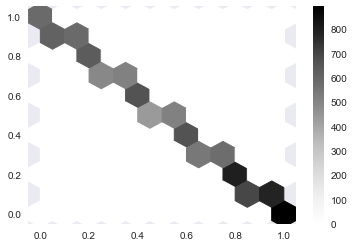

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dset = np.random.dirichlet((0.8, 0.70), 10000)
plt.hexbin(dset[:,0], dset[:,1], gridsize=10, mincnt=0)
plt.colorbar()

And also in 3d (although this is much harder to see

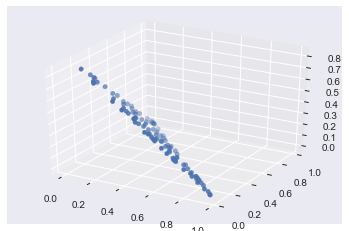

In [71]:
from mpl_toolkits.mplot3d import Axes3D
dset = np.random.dirichlet((0.8, 0.70, 0.5), 100)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(dset[:,0], dset[:,1], dset[:,2])


### And finally, LDA

Assume that $M$ documents are included in the corpus $C_M$, and each document is indexed by $d$ with $d \in \{1,...,M\}$.

Document $d$ has $n_d$ word-tokens, each indexed by $t$ with $t \in \{1,...,n_d\}$.

The total number of word-tokens for all documents is $N_M = \sum\limits_{d = 1}^M  n_{d}$ .

As before, the vocabulary $V_W$ has $W$ words, and each word is indexed by $v$ with $v \in \{1,...,W\}$.

Finally, there are $K$ topics in the  corpus $C_M$, and each topic is indexed by $z$ with $z \in \{1,...,K\}$.

A document $d$ has a distribution over topics: $\Theta _{dz} = p(z|d)$. That means in document $d$ each word-token is selected from topic $z$ with probability, $\Theta _{dz}$.

A topic $z$ has a distribution over words in the vocabulary list: $\Phi _{zv} = p(v|z)$.

### Summary

So our topics are effectively our dimensions (alphas) from the dirichlet distribution. 

The words are our individual data points and thus our documents are the summation of words given their topic distribution.

In [128]:
#The number of documents
D = len(corpus)
#The number of topics
K = 5
D, K

(9, 5)

In [129]:
lda = gs.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=K)

In [136]:
lda.print_topics(num_words = 3)


[(0, '0.220*"interfac" + 0.220*"human" + 0.220*"comput"'),
 (1, '0.280*"system" + 0.193*"ep" + 0.105*"user"'),
 (2, '0.211*"tree" + 0.211*"graph" + 0.115*"time"'),
 (3, '0.086*"tree" + 0.084*"graph" + 0.084*"system"'),
 (4, '0.192*"survey" + 0.105*"system" + 0.105*"user"')]

Now that we have the topics, we could see what the likelihood is for each document that it belongs to a certain topic.

Given that we know what weighting of tokens identifies a topic and the tokens in a document, we really only need to multiple the tokens in the document by the weights to get the score. These final weights let you rank topic fit/description for a document.

This is most easily done with numpy (since we can broadcast multiplication). 



In [132]:
import numpy as np

doc_topics = np.zeros([D, K])

for tmp_docID in range(D):
    p_oned_t = lda.get_document_topics(corpus[tmp_docID])
    for a,b in p_oned_t:
        doc_topics[tmp_docID, a] = b   

doc_topics

array([[0.79927611, 0.0504727 , 0.05000513, 0.05002572, 0.05022032],
       [0.02887421, 0.02925133, 0.02903259, 0.02859976, 0.88424212],
       [0.04067834, 0.83860862, 0.04031511, 0.04003051, 0.04036739],
       [0.04066782, 0.83914852, 0.04000442, 0.04002241, 0.04015685],
       [0.05002103, 0.05044983, 0.79790998, 0.05005189, 0.05156732],
       [0.10002661, 0.10148313, 0.59841263, 0.1000663 , 0.10001138],
       [0.0666813 , 0.06706038, 0.73248512, 0.0667029 , 0.06707031],
       [0.05001407, 0.05018837, 0.79909879, 0.05003507, 0.05066367],
       [0.05001942, 0.05000858, 0.05215761, 0.05004836, 0.79776603]])

In [133]:
max_args = np.argmax(doc_topics, axis=1)
print(max_args)
#And using argmax to get the highest - have to translate from individual to 2d
max_idx = (np.linspace(0, D-1, D, dtype=int), max_args)
print(max_idx)
#And then pull out the maximum values with the index
doc_topics[max_idx]

[0 4 1 1 2 2 2 2 4]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([0, 4, 1, 1, 2, 2, 2, 2, 4]))


array([0.79927611, 0.88424212, 0.83860862, 0.83914852, 0.79790998,
       0.59841263, 0.73248512, 0.79909879, 0.79776603])

## There is more to gensim's LDA implementation though

<pre>class gensim.models.ldamodel.LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<type 'numpy.float32'>)</pre>

The first three parameters are straightforward and we've already covered them. After `distributed`, these parameters get interesting and start to matter.

* `chunksize` - the number of documents to load into memory at a time (training is done as a batch update)
* `update_every` - the number of chunks to process before moving to the maximization step (i.e. optimizing parameters).
* `passes` - the number of times you go through the corpus. The size of your corpus and variety of your training documents should guide you on the number of passes. 
* `minimimum_probability` - controls filtering the topics returning for a document (cutting out low probability topics)

The important distributional parameters

* `alpha` - is a hyperparameter that affects the sparcity of the document-topic distribution. By default it is set to 1/num_topics.
* `eta` - is a parameter that contorls the topic over word distribution. 

In [154]:
lda = gs.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=K, alpha=0.01, random_state=1)
lda.print_topics(num_words = 3)

[(0, '0.143*"survey" + 0.143*"system" + 0.143*"time"'),
 (1, '0.234*"system" + 0.128*"graph" + 0.128*"human"'),
 (2, '0.128*"tree" + 0.128*"interfac" + 0.128*"minor"'),
 (3, '0.262*"tree" + 0.143*"interfac" + 0.143*"human"'),
 (4, '0.222*"respons" + 0.222*"user" + 0.222*"time"')]

In [155]:
lda = gs.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=K, alpha='symmetric', random_state=1)
lda.print_topics(num_words = 3)

[(0, '0.142*"time" + 0.142*"survey" + 0.142*"system"'),
 (1, '0.087*"tree" + 0.084*"graph" + 0.084*"system"'),
 (2, '0.221*"graph" + 0.153*"tree" + 0.152*"minor"'),
 (3, '0.233*"system" + 0.233*"human" + 0.127*"interfac"'),
 (4, '0.187*"user" + 0.187*"respons" + 0.186*"time"')]

In [156]:
lda = gs.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=K, alpha='auto', random_state=1)
lda.print_topics(num_words = 3)

[(0, '0.142*"time" + 0.142*"survey" + 0.142*"system"'),
 (1, '0.087*"tree" + 0.084*"graph" + 0.084*"system"'),
 (2, '0.221*"graph" + 0.153*"tree" + 0.152*"minor"'),
 (3, '0.233*"system" + 0.233*"human" + 0.127*"interfac"'),
 (4, '0.187*"user" + 0.187*"respons" + 0.186*"time"')]

My enforced alpha parameter of 0.01 is much less than the default (0.20) and returns mildly different weightings.

## What model is best???

## How to get the number of topics?

## QUESTIONS!!!!!!???!!?!

From this trivial example, you can already see that there are a number of parameters that can be played with and will affect the final posterior distributions and topics. The question is, **how do we know that we have found a good model?**

One of the most important input parameters for LDA model is the number of topics, $K$. Neither too many nor too few topics is good for topic modeling: A model with too many topics will may split one meaningful topic into several smaller ones; A model with too few topics will result in very broad topics that sometimes are hard to interpret. $K=50$ and $K=100$ are two commonly used choices in the literature for very large corpora. 

A systematic way that is used in the computer science field to determine the number of topics is to use the measure of [perplexity](https://en.wikipedia.org/wiki/Perplexity), which has been proposed to assess generalizability of text models across subsets of documents. 
The underlying assumption is that: 
* A topic model estimated on a subset of documents should be able to predict word choice in the remaining set of documents (the performance can be measured by perplexity); 
* And we should choose the number of topics that leads to the best performance (lowest perplexity) of this task.


### Perplexity

It is a widely accepted method to estimate a topic model based on a portion of  corpus (the training dataset) and then test the fit of the topic model on the hold-out portion of the corpus (the test dataset). 
The quality of a topic model can be assessed by calculating the joint probability of creating the test  corpus based on the topic model generated out of the the training corpus.
Perplexity is the most commonly used measurement to calculate this probability.
It represents the inverse of the geometric mean per-word likelihood  

\begin{equation} \label{eq_perplexity01}
	\text{perplexity}\left( {{D_{\text{test}}}} \right) = \exp \left\{ { - \frac{{\sum\limits_{d = 1}^{M_{test}} {\sum\limits_{t = 1}^{{n_d}} {\log p\left( {{w_{dt}}| \text{model} } \right)} } }}{{\sum\limits_{d = 1}^{M_{test}} {{n_d}} }}} \right\} \; ,
\end{equation}
where $D_{test}$ denotes the testing corpus; ${M_{\text{test}}}$ is the number of documents in the test dataset; $n_d$ is the number of tokens in document $d$; $w_{dt}$ means the observed term for  token $t$ in document $d$; $p(w_{dt}|\text{model})$ means the probability of term  $w_{dt}$ given the returned topic model based on the  training corpus.


# Dataset

For this task, we have a corpus that is generated from the abstracts of published papers in the Web of Science. These abstracts were extracted from 7 journals, covering somewhat disparate fields:

* Science
* Cell
* Journal of Differential Equations
* Astronomical Journal
* Geology
* Schizophrenia Bulletin
* American Economic Review

In `wos_topic_doc.json` there are 40000 abstracts.

In [73]:
import json
wosdata = json.load(open('../data/wos_topic_doc.json'))
wosdata.keys()

dict_keys(['JOURNAL_OF_DIFFERENTIAL_EQUATIONS', 'SCIENCE', 'AMERICAN_ECONOMIC_REVIEW', 'CELL', 'SCHIZOPHRENIA_BULLETIN', 'GEOLOGY', 'ASTRONOMICAL_JOURNAL'])

To make this feasible for class we will only use GEOLOGY, CELL, and AMERICAN_ECONOMIC_REVIEW

In [74]:
journals = [k for k in wosdata if k in ['GEOLOGY', 'CELL', 'AMERICAN_ECONOMIC_REVIEW']]
full_docs = []
for k in journals:
    full_docs += wosdata[k]
print('Number of abstracts', len(full_docs))

Number of abstracts 12096


Now we need to partition this into a training set and testing set (because we want to see how the expectation changes from train to test). 

In [81]:
#setting a seed so we all get the same train/test
np.random.seed(6)
#testing will be 20%
train_num = int(0.8 * len(full_docs))
#We can shuffle the dataset and just take up to train_num and then the test is the leftover
np.random.shuffle(full_docs)
train_docs = full_docs[:train_num]
test_docs = full_docs[train_num:]

Now we need to do the basic conversion to a dictionary and BoW

In [82]:
#Create the dictionary - note that we use all documents *not* the train or test 
dictionary = corpora.Dictionary(full_docs)
#And the the corpuses
##training
corpus_train = []
for tmp_doc in train_docs:
    corpus_train += [dictionary.doc2bow(tmp_doc)]
##testing
corpus_test = []
for tmp_doc in test_docs:
    corpus_test += [dictionary.doc2bow(tmp_doc)]

In [92]:
assumed_alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

train_perplex, test_perplex, model_bound = [], [], []
topic_descriptions = {}

for tmp_alpha in assumed_alpha:
    lda = gs.models.ldamodel.LdaModel(corpus=corpus_train, id2word=dictionary, num_topics=3, \
                                      alpha=tmp_alpha, random_state=1)
    train_perplex.append( 2**-lda.log_perplexity(corpus_train) )
    test_perplex.append( 2**-lda.log_perplexity(corpus_test) )
    model_bound.append( lda.bound(corpus_test) )
    topic_descriptions[tmp_alpha] = lda.print_topics(num_words = 5)
    print(tmp_alpha)

0.001
0.005
0.01
0.05
0.1
0.2
0.3
0.4
0.5


(300, 305)

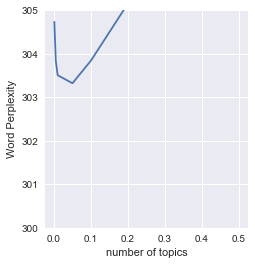

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.plot(assumed_alpha, train_perplex, label='train')
ax.plot(assumed_alpha, test_perplex, label='test')
ax.set_ylabel('Word Perplexity')
ax.set_xlabel('alpha')

And we can do the same for the number of topics

In [98]:
assumed_K_list = [x+2 for x in range(9)]

train_perplex, test_perplex, model_bound = [], [], []
topic_descriptions = {}

for tmp_k in assumed_K_list:
    lda = gs.models.ldamodel.LdaModel(corpus=corpus_train, id2word=dictionary, num_topics=tmp_k, \
                                      alpha=0.05, random_state=1)
    train_perplex.append( 2**-lda.log_perplexity(corpus_train) )
    test_perplex.append( 2**-lda.log_perplexity(corpus_test) )
    model_bound.append( lda.bound(corpus_test) )
    topic_descriptions[tmp_k] = lda.print_topics(num_words = 5)
    if tmp_k%5==0:
        print(tmp_k)

5
10


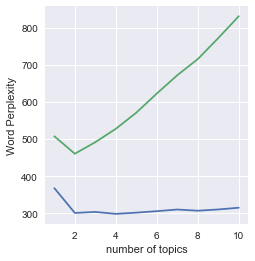

In [99]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.plot(assumed_K_list, train_perplex, label='train')
ax.plot(assumed_K_list, test_perplex, label='test')
ax.set_ylabel('Word Perplexity')
ax.set_xlabel('number of topics')

And thus it would appear that 2 topics would be best...what are the words that describe those topics.

In [100]:
topic_descriptions[2]

[(0,
  '0.005*"model" + 0.004*"fault" + 0.004*"dure" + 0.004*"similar" + 0.004*"data"'),
 (1,
  '0.016*"cell" + 0.014*"protein" + 0.009*"activ" + 0.008*"gene" + 0.006*"express"')]

**Why?**

# Something, possibly simpler.

A frequent testing dataset for LDA is news group corpus data. I've uploaded it ofr everyone to use in `../data/20ng-test-all-terms.txt`

Load the data now.

Randomly choose 10% of all the documents from the 20 News Group corpus (maintaining a uniform appearance across topics) 

Clean the data: Stem all the words, remove stopwords.

Assume the number of topics in the corpus is 10, find the top 10 words in each topic and summarize the main idea of each topic. 

# And the big question

What's the difference between identifying communities in a network and the number of topics in a corpus?